[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0             6      148             72             35        0  33.60   
2             8      183             64             27        0  23.30   
4             0      137             40             35      168  43.10   
6             3       78             50             32       88  31.00   
8             2      197             70             45      543  30.50   
9             8      125             96             27        0  34.25   
11           10      168             74             27        0  38.00   
13            1      189             60             23      846  30.10  

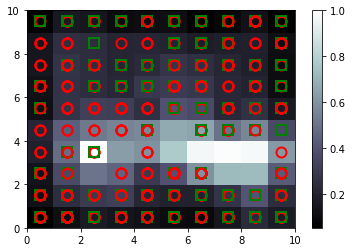

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64             27        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  winner  
0                     0.627   50        1  (2, 0)  
2                     0.672   32        1  (0, 2)  
4                     2.288   33        1  (8, 0)  
6                     0.248   26        1  (4, 5)  
8                     0.158   53        1  (6, 8)  


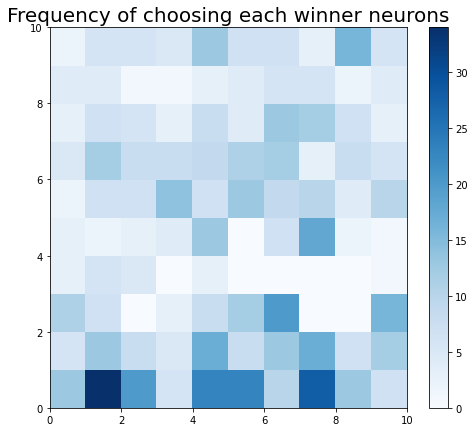

length of X: 768


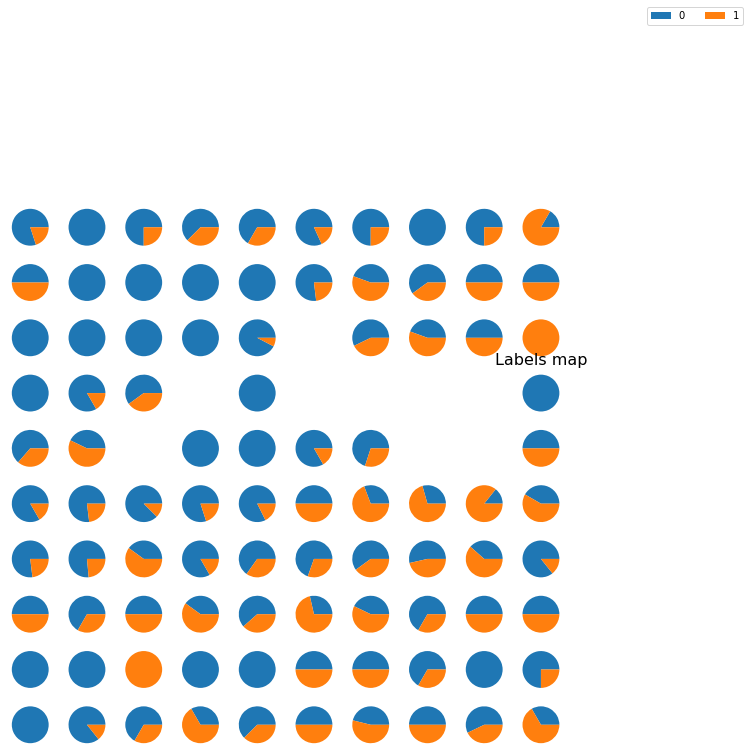

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.130155       0.209155       0.044593   
Glucose                      0.130155  1.000000       0.224684       0.215366   
BloodPressure                0.209155  0.224684       1.000000       0.159653   
SkinThickness                0.044593  0.215366       0.159653       1.000000   
Insulin                     -0.074531  0.309058      -0.043125       0.204425   
BMI                          0.023887  0.236225       0.285945       0.573227   
DiabetesPedigreeFunction    -0.033523  0.138353      -0.001336       0.144541   
Age                          0.544341  0.268910       0.325306       0.063847   
Outcome                      0.221898  0.495990       0.173316       0.282844   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.074531  0.023887                 -0.033523   
Glucose                   0.309058  0.236

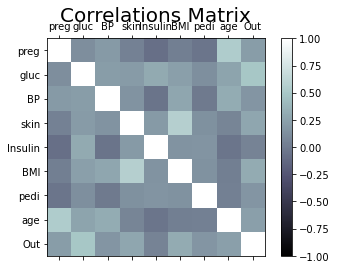

this is pdf1 [[2 0]
 [0 2]
 [8 0]
 ...
 [8 9]
 [6 1]
 [0 0]]
the weight assigned to each input feature of the winner neuron using hebbian rule :
[ 14-Jul-2020 17:55:45 ] HEBB: Last Weights
[-35.26 -28.14]
Net input of every winner neuron from the input layer : [-78.19999999999989, -63.959999999999816, -289.75999999999993, -289.4199999999998, -444.3599999999997, -183.9799999999999, -352.8199999999997, -381.29999999999984, -367.05999999999983, -141.59999999999988, -176.85999999999987, -254.49999999999994, -275.51999999999987, -367.05999999999983, -472.4999999999996, -381.29999999999984, -465.71999999999974, -148.7199999999999, -338.57999999999964, -282.2999999999997, -458.59999999999974, -204.99999999999986, -254.49999999999994, -71.07999999999986, -578.2799999999995, -543.0199999999995, -219.23999999999992, -486.7399999999997, -543.0199999999995, -176.85999999999987, -92.09999999999978, -451.47999999999973, -218.89999999999975, -169.73999999999984, -78.19999999999989, -458.5999999999997

In [77]:
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import Final22
from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os
import sklearn.metrics
from SimpSOM import somNet

# Importing the dataset 
dataset=pd.read_csv('diabetes (1).csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for BMI
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)


#Replacing the zero-values for Glucose
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for Insulin
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

#Replacing the zero-values for Skin Thickness
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

print(dataset.head(20))



from sklearn.preprocessing import MinMaxScaler
X=sklearn.preprocessing.normalize(X)


print(X)

# Training the SOM
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=len(X.T),learning_rate=1.6,random_seed=10)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=200)
qt=som.quantization_error(X)
print("Quantizaion error:",qt)


# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
win=[]
for i, x in enumerate(X):
    w = som.winner(x)
    win.append(w)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

mappings = som.win_map(X)

dataset['winner']=win
print(dataset.head())

plt.figure(figsize=(8, 7))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.title("Frequency of choosing each winner neurons",fontsize=20)
plt.show()

print("length of X:",len(X))



labels_map = som.labels_map(X, y)
label_names = np.unique(y)

plt.figure(figsize=(10, 10))

the_grid = GridSpec(10, 10)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names, bbox_to_anchor=(5,9), ncol=3)
plt.title("Labels map",fontsize=16)

plt.show()

names = ['preg', 'gluc', 'BP', 'skin', 'Insulin', 'BMI', 'pedi', 'age', 'Out']
correlations = dataset.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.title('Correlations Matrix',fontsize=20)
plt.show()
cor = defaultdict(list)


# Importing the libraries
import hebbian
import numpy as np
import itertools
from matplotlib.gridspec import GridSpec
np.random.seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import skimage.data
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage.transform import resize
import Final2
from neupy import algorithms
from pandas import read_csv
from collections import defaultdict
import os
from SimpSOM import somNet

model1=hebbian.Hebbian(eta=0.01,n_iter=1)



dataset['winner']=win
pdf=pd.DataFrame(win,columns=['p1','p2'])


pdf1=pdf.iloc[:, :].values
print("this is pdf1", pdf1)
print("the weight assigned to each input feature of the winner neuron using hebbian rule :")
model1.fit((np.array(pdf1)),(np.array(dataset['Outcome'])))

ac=list(model1.net_input(np.array(pdf1)))
print("Net input of every winner neuron from the input layer :",list(model1.net_input(np.array(pdf1))))
print("UPDATED WEIGHTS OF THE NETWORK",model1.w_)

In [78]:
from sklearn.cluster import KMeans
df=pd.DataFrame(ac)
df.dropna(axis=0,inplace=True)
df.info()
dataset['weights']=df
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 1 columns):
0    768 non-null float64
dtypes: float64(1)
memory usage: 12.0 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,weights
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958,-272.670521
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951,135.275513
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000,-578.280000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000,-367.060000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000,-268.060000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000,-181.945000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000,-7.680000


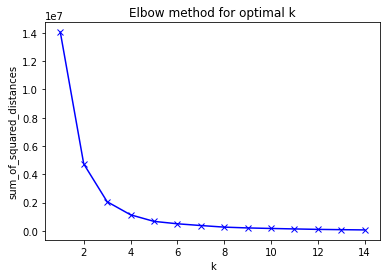

In [86]:
kmeans=KMeans(n_clusters=4)
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(df)    
    sum_of_squared_distances.append(k_means.inertia_)
          
            
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [87]:
kmeans=KMeans(n_clusters=4)

In [115]:
kmeans.fit_predict(df)

array([2, 2, 0, 0, 1, 0, 3, 3, 3, 2, 0, 0, 0, 3, 1, 3, 1, 2, 3, 0, 1, 0,
       0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 3, 0, 2, 2, 3, 0, 0, 2, 1, 3, 2, 3, 3, 0, 3, 3, 0, 0, 3, 0, 2,
       2, 0, 0, 0, 0, 3, 0, 3, 2, 0, 0, 2, 3, 2, 3, 3, 0, 2, 2, 3, 2, 0,
       3, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 3, 0, 1, 2, 2,
       3, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 3, 3, 1, 0, 1, 0,
       3, 2, 0, 1, 0, 0, 0, 3, 0, 2, 3, 0, 3, 2, 2, 3, 0, 2, 3, 0, 1, 3,
       0, 2, 1, 1, 0, 3, 2, 3, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 2, 3, 0, 0,
       3, 3, 2, 0, 2, 0, 1, 2, 3, 0, 0, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 0,
       3, 0, 3, 1, 0, 2, 2, 3, 3, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 2, 2, 3,
       0, 1, 3, 0, 0, 3, 3, 2, 0, 2, 0, 2, 3, 2, 2, 2, 3, 1, 3, 3, 2, 0,
       0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 1, 1, 0, 0, 1,
       3, 1, 0, 0, 0, 0, 1, 3, 0, 3, 3, 1, 1, 0, 3,

0      -78.20
1      -63.96
2     -289.76
3     -289.42
4     -444.36
        ...  
763   -465.72
764    -42.94
765   -543.02
766   -247.38
767     -7.68
Name: weights, Length: 768, dtype: float64


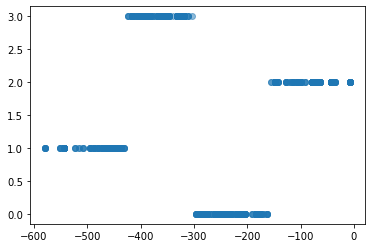

In [116]:

dataset['weights']=df
print(dataset['weights'])
plt.scatter(dataset['weights'],kmeans.labels_,alpha=0.5)
dataset['Severity of diabetes']=kmeans.labels_

In [118]:

dataset['Severity of diabetes'].replace(to_replace =3, 
                 value ="LOW",inplace=True)
dataset['Severity of diabetes'].replace(to_replace =0, 
                 value ="MODERATE",inplace=True)
dataset['Severity of diabetes'].replace(to_replace =2, 
                 value ="HIGH",inplace=True)
dataset['Severity of diabetes'].replace(to_replace=1,
                                       value='NO DIABETES',inplace=True)
dataset.dropna(axis=0,inplace=True)
dataset.reset_index(drop=True,inplace=True)
    
print(dataset.head(10))
print(dataset['Outcome'].value_counts())
print(dataset["Severity of diabetes"].value_counts())

    
    

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0  33.60   
1            8      183             64             27        0  23.30   
2            0      137             40             35      168  43.10   
3            3       78             50             32       88  31.00   
4            2      197             70             45      543  30.50   
5            8      125             96             27        0  34.25   
6           10      168             74             27        0  38.00   
7            1      189             60             23      846  30.10   
8            5      166             72             19      175  25.80   
9            7      100             74             27        0  30.00   

   DiabetesPedigreeFunction  Age  Outcome  winner  weights  \
0                     0.627   50        1  (2, 0)   -78.20   
1                     0.672   32        1  (0, 2)   -63.96   
2         

In [120]:
dataset.loc[:,'error']=0
    
C=dataset[dataset['Severity of diabetes']=="LOW"][dataset['Outcome']==1]['error'].count()
c=dataset[dataset['Outcome']==0]['error'].count()
d=dataset[dataset['Outcome']==1]['error'].count()

print(dataset[dataset['Severity of diabetes']=='HIGH']['weights'])


  
    
print("error rate =",(C)/(c+d) * 100)

0      -78.20
1      -63.96
9     -141.60
17    -148.72
23     -71.08
        ...  
758   -148.72
760   -120.24
761    -78.20
764    -42.94
767     -7.68
Name: weights, Length: 162, dtype: float64
error rate = 8.333333333333332


C:\Users\Vibha\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
